<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap11/Trail3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex > /dev/null && echo "Apex library is successfully installed!"!

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-22sjmv54
Albumentation library is successfully installed!
  Running command git clone -q https://github.com/NVIDIA/apex /tmp/pip-req-build-7h1fkjjw
  Running command git submodule update --init --recursive -q
Apex library is successfully installed!!


In [3]:
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/gdrive


In [4]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap11/'
os.chdir(folder)
print(os.getcwd()) 
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap11
Trial2.ipynb
Trial1.ipynb
DrawCurve.ipynb
Trail3.ipynb
bestmodel.pt
__init__.py
transforms.py
train_test.py
show_images.py
model.py
lr_finder.py
gradcam.py
plot.py
evaluate.py
load_data.py
lr_range_test.py
chap11Resnet.py
train_test.cpython-36.pyc
__init__.cpython-36.pyc
load_data.cpython-36.pyc
show_images.cpython-36.pyc
chap11Resnet.cpython-36.pyc
evaluate.cpython-36.pyc
transforms.cpython-36.pyc
gradcam.cpython-36.pyc
plot.cpython-36.pyc
lr_range_test.cpython-36.pyc
cifar-10-python.tar.gz
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta
readme.html


In [0]:
%matplotlib inline
import torch
from template import load_data
from template import show_images
from template import chap11Resnet
from template import train_test
from template import evaluate
from template import transforms
from template import gradcam
from template import plot
from template import lr_range_test 

In [0]:
import albumentations as A
import cv2
train_transform_list = [
                          A.PadIfNeeded(min_height=36, min_width=36, border_mode = cv2.BORDER_REFLECT, always_apply=True,p=1.0),##28 + 4 + 4 = 36
                          A.RandomCrop(height=32, width=32, always_apply=True), #RandomCrop 32, 32 (after padding of 4) 
                          A.HorizontalFlip(p = 0.7),
                          A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
                          A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=0.7) # fillvalue is 0 after normalizing as mean is 0
                       ]
test_transform_list = [A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))]
train_transform = transforms.AlbumentationTransforms(train_transform_list)
test_transform = transforms.AlbumentationTransforms(test_transform_list)

In [7]:
classes, trainloader, testloader = load_data.load(train_transform,test_transform,_batch_size=512)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


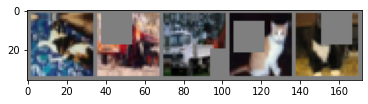

In [8]:
show_images.show_images(trainloader, classes)

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = chap11Resnet.chap11Resnet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

epoch = 1 Lr = 0.001  Loss=1.4200586080551147 Batch_id=97 Accuracy=37.21: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
epoch = 2 Lr = 0.0029  Loss=1.317488670349121 Batch_id=97 Accuracy=44.02: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
epoch = 3 Lr = 0.0048  Loss=1.2204562425613403 Batch_id=97 Accuracy=42.05: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.2181898355484009 Batch_id=97 Accuracy=41.12: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
epoch = 5 Lr = 0.0086  Loss=1.7674942016601562 Batch_id=97 Accuracy=22.78: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
epoch = 6 Lr = 0.0105  Loss=1.7610208988189697 Batch_id=97 Accuracy=23.23: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.77719247341156 Batch_id=97 Accuracy=21.28: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.7394593954086304 Batch_id=97 Accuracy=22.16: 100%|██████████| 98/98 [00

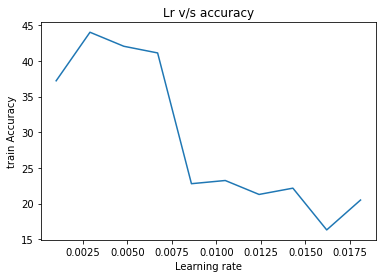

In [9]:
import torch.nn as nn
max_lr = 0.02
min_lr = 0.001
epoch = 10
criterion = nn.NLLLoss()
lr_range_test.LR_test(max_lr, min_lr,device,epoch,model,criterion,trainloader,momemtum = 0.9,weight_decay=0.05, plot= True )

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.005 ) 
criterion = nn.NLLLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.0125, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.25, anneal_strategy='linear', 
                       cycle_momentum=False, base_momentum=0.8, max_momentum=0.9, div_factor=10.0,final_div_factor =1)

In [11]:
test_loss = []
test_acc = []
train_loss = []
train_acc = []
EPOCHS = 22
best_acc = 0
LR = []

for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     LR.append(optimizer.param_groups[0]['lr'])
     train_loss, train_acc = train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
     if(test_acc[-1]>best_acc):
       print("accuracy increased, Saving model....")
       best_acc = test_acc[-1]
       torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': test_loss[-1],
            }, "/content/gdrive/My Drive/school_of_ai/chap11/bestmodel.pt")

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00125


Loss=1.426729440689087 Batch_id=97 Accuracy=38.54: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5141/10000 (51.41%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.00125


Loss=1.0837007761001587 Batch_id=97 Accuracy=54.18: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6009/10000 (60.09%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.00125


Loss=1.0027592182159424 Batch_id=97 Accuracy=60.18: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 6393/10000 (63.93%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.00125


Loss=0.9163181781768799 Batch_id=97 Accuracy=64.95: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6910/10000 (69.10%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.00125


Loss=0.8698111176490784 Batch_id=97 Accuracy=67.62: 100%|██████████| 98/98 [00:23<00:00,  4.13it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6917/10000 (69.17%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.00125


Loss=0.8933100700378418 Batch_id=97 Accuracy=70.21: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7177/10000 (71.77%)

accuracy increased, Saving model....
EPOCH: 7 LR: 0.00125


Loss=0.7799103260040283 Batch_id=97 Accuracy=72.12: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7483/10000 (74.83%)

accuracy increased, Saving model....
EPOCH: 8 LR: 0.00125


Loss=0.7326427102088928 Batch_id=97 Accuracy=73.78: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7495/10000 (74.95%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.00125


Loss=0.7360314726829529 Batch_id=97 Accuracy=75.31: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7604/10000 (76.04%)

accuracy increased, Saving model....
EPOCH: 10 LR: 0.00125


Loss=0.6123026609420776 Batch_id=97 Accuracy=76.39: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7795/10000 (77.95%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.00125


Loss=0.6433875560760498 Batch_id=97 Accuracy=77.53: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7640/10000 (76.40%)

EPOCH: 12 LR: 0.00125


Loss=0.6155083775520325 Batch_id=97 Accuracy=78.65: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7830/10000 (78.30%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.00125


Loss=0.5904607176780701 Batch_id=97 Accuracy=79.28: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7904/10000 (79.04%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.00125


Loss=0.5616015791893005 Batch_id=97 Accuracy=80.27: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7901/10000 (79.01%)

EPOCH: 15 LR: 0.00125


Loss=0.5226990580558777 Batch_id=97 Accuracy=80.80: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8034/10000 (80.34%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.00125


Loss=0.5583057999610901 Batch_id=97 Accuracy=81.63: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8029/10000 (80.29%)

EPOCH: 17 LR: 0.00125


Loss=0.5546784400939941 Batch_id=97 Accuracy=82.17: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8205/10000 (82.05%)

accuracy increased, Saving model....
EPOCH: 18 LR: 0.00125


Loss=0.4836432933807373 Batch_id=97 Accuracy=82.86: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8262/10000 (82.62%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.00125


Loss=0.49505382776260376 Batch_id=97 Accuracy=83.46: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8270/10000 (82.70%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.00125


Loss=0.4755789041519165 Batch_id=97 Accuracy=83.99: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8223/10000 (82.23%)

EPOCH: 21 LR: 0.00125


Loss=0.42087310552597046 Batch_id=97 Accuracy=84.48: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8197/10000 (81.97%)

EPOCH: 22 LR: 0.00125


Loss=0.5142015814781189 Batch_id=97 Accuracy=85.15: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]



Test set: Average loss: 0.0010, Accuracy: 8300/10000 (83.00%)

accuracy increased, Saving model....


In [12]:
test_loss = []
test_acc = []
train_loss = []
train_acc = []
EPOCHS = 22
best_acc = 0
LR = []

for epoch in range(23,25):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     LR.append(optimizer.param_groups[0]['lr'])
     train_loss, train_acc = train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
     if(test_acc[-1]>best_acc):
       print("accuracy increased, Saving model....")
       best_acc = test_acc[-1]
       torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': test_loss[-1],
            }, "/content/gdrive/My Drive/school_of_ai/chap11/bestmodel.pt")

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 24 LR: 0.00125


Loss=0.4420853555202484 Batch_id=97 Accuracy=85.59: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8313/10000 (83.13%)

accuracy increased, Saving model....
EPOCH: 25 LR: 0.00125


Loss=0.4113676846027374 Batch_id=97 Accuracy=85.97: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]



Test set: Average loss: 0.0010, Accuracy: 8342/10000 (83.42%)

accuracy increased, Saving model....


In [13]:
model = chap11Resnet.chap11Resnet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9 ,weight_decay = 0.0005)
checkpoint = torch.load("/content/gdrive/My Drive/school_of_ai/chap11/bestmodel.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()
print("Loaded the best model")

Loaded the best model


In [14]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 83 %


In [15]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 75 %
Accuracy of   car : 100 %
Accuracy of  bird : 62 %
Accuracy of   cat : 50 %
Accuracy of  deer : 71 %
Accuracy of   dog : 100 %
Accuracy of  frog : 83 %
Accuracy of horse : 90 %
Accuracy of  ship : 90 %
Accuracy of truck : 88 %


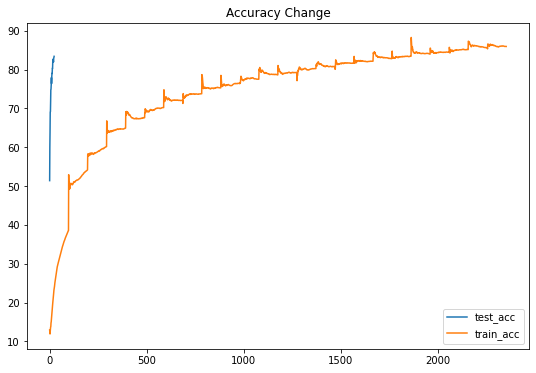

In [19]:
def plot_curve(curves,title,Figsize = (7,7)):
    fig = plt.figure(figsize=Figsize)
    ax = plt.subplot()
    for curve in curves:
        ax.plot(curve[0], label=curve[1])
        plt.title(title)
    ax.legend()
    plt.show()
curves = [(test_acc,"test_acc"),(train_acc,"train_acc")]
plot_curve(curves,"Accuracy Change",Figsize = (9,6))

In [0]:
misclassified_images = evaluate.show_misclassified_images(model, device, testloader, classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


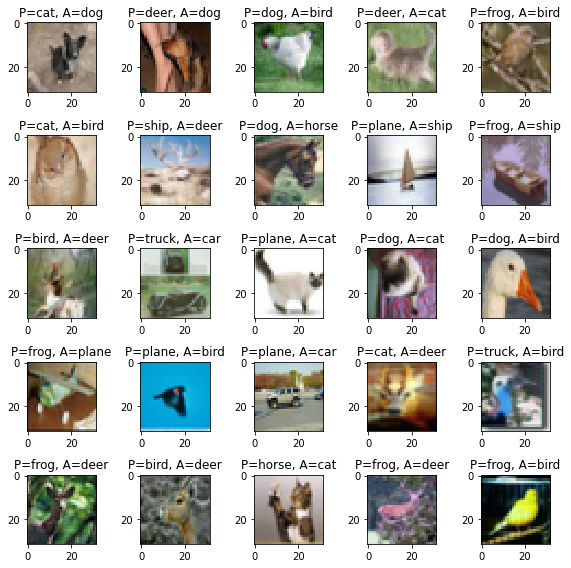

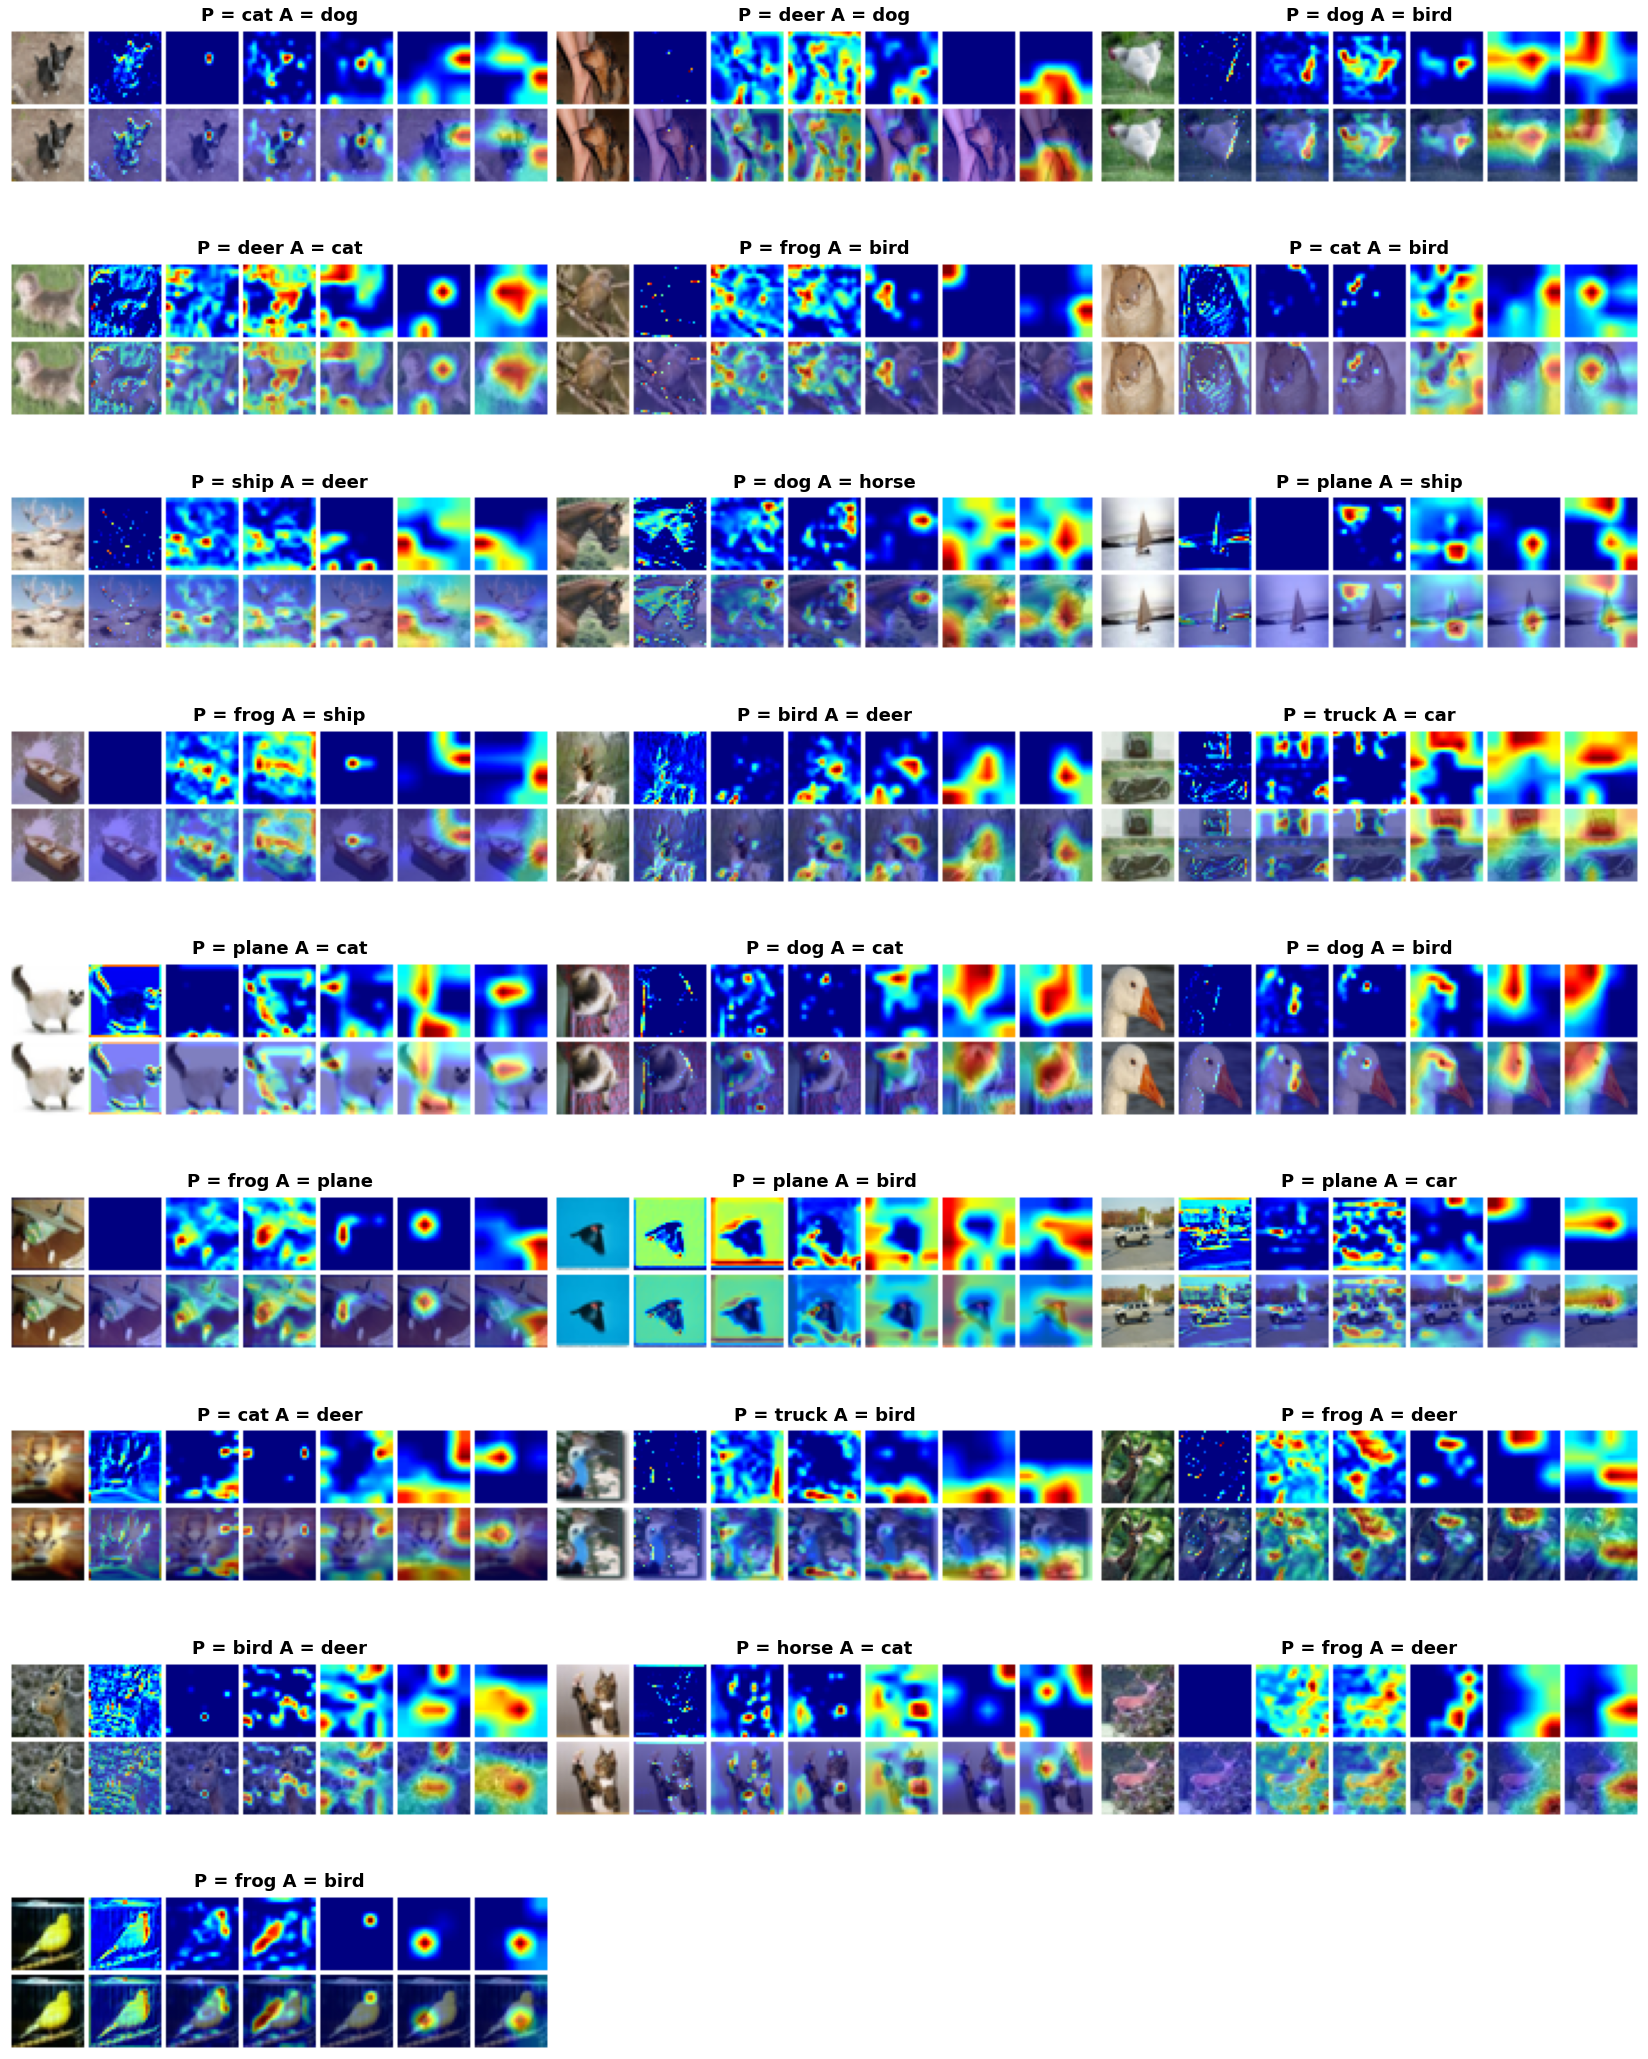

In [21]:
layers = [model.prepLayer, model.x1,model.R1,model.layer2,model.x2,model.R2]
miscalssified_images = evaluate.show_misclassified_images(model, device, testloader, classes)
gradcam.GradCamView(miscalssified_images,model,classes,layers)